**kalın metin**### **INITIAL ANALYSIS - AIR QUALITY PREDICTION**



**Data set:** Air Quality Data Set from UCI Machine Learning Repository

https://archive.ics.uci.edu/dataset/360/air+quality

**Target Variable:** The target variable = ozone_conc, represent the concentration of ozone in the air.

### **Problem Definition:**
The problem addressed here is the prediction and management of air quality in urban areas using analytics. Traditional methods of monitoring air quality often rely on manual sampling and periodic measurements, which can be time-consuming and may not provide real-time insights, leading to challenges in accurately assessing and managing pollution levels. By leveraging analytics, we aim to develop models that can accurately predict air quality levels based on various factors and identify sources of pollution in urban environments.

### **Business Problem and Implications:**
**Business Problem:**

In urban centers around the globe, air quality has become a pressing environmental and public health issue. The conventional method of air quality assessment often involves sporadic and manual data collection, which fails to provide the granularity needed for timely interventions. This project aims to enhance the precision and responsiveness of air quality monitoring by leveraging predictive analytics. Through the development of sophisticated predictive models that consider a variety of environmental and meteorological parameters, the initiative seeks to bolster decision-making processes aimed at mitigating air pollution and preserving urban health.

## **Implications**

**Healthcare Cost Reduction:** By accurately predicting and managing air quality, healthcare costs associated with respiratory illnesses and other health issues related to poor air quality can be reduced. This can result in significant cost savings for individuals, healthcare providers, and government agencies.

   **Quality of Life Improvement:** Improved air quality can lead to a better quality of life for urban residents, with reduced respiratory problems, allergies, and other health issues. This can result in a more productive and healthier population, benefiting both individuals and society as a whole.

   **Government and Environmental Organizations:** Accurate air quality predictions can help government agencies and environmental organizations make informed policy decisions. This can lead to the implementation of effective strategies to reduce pollution levels and improve air quality in urban areas.

   **Urban Planners:** Urban planners can use air quality predictions to inform infrastructure and transportation planning. By reducing emissions and improving air quality, urban planners can create healthier and more sustainable urban environments.

  **Public Awareness and Engagement:** Access to real-time air quality information can raise public awareness about the importance of air quality and encourage community engagement in environmental conservation efforts. This can lead to a more environmentally conscious population and greater support for environmental initiatives.

  **Business Benefits:** Businesses can benefit from improved air quality through a healthier workforce and increased productivity. By promoting a healthy work environment, businesses can reduce absenteeism and improve employee morale and satisfaction.


## **Objective:**

The objective is to develop analytics models that can accurately predict air quality levels in urban areas utilizing historical air quality data along with relevant environmental and meteorological factors to forecast pollution levels accurately. These models will assist stakeholders in making informed decisions to manage and improve air quality in urban environments, thereby addressing both financial and social implications associated with poor air quality.

 ### **Data Dictionary**

The dataset underpinning this analysis encompasses a range of variables linked to air quality factors. Below is a succinct data dictionary elucidating each variable included in the dataset:

**Date:** Reflects the calendar date on which the observations were recorded.

**Time:** Captures the precise time at which observations were noted.

**CO(GT):** Measures the concentration levels of Carbon Monoxide in mg/m³.

**PT08.S1(CO):** Indicates the readings from a tin oxide sensor gauging CO
presence.

**NMHC(GT):** Reflects the levels of Non-Methane Hydrocarbons measured in microg/m³.

**C6H6(GT):** Provides the concentration of Benzene in the air, recorded in microg/
m³.

**PT08.S2(NMHC):** Represents readings from a titania sensor for NMHC.

**NOx(GT):** Measures the concentration of Nitrogen Oxides present in parts per billion.

**PT08.S3(NOx):** Shows the response of a tungsten oxide sensor for NOx.

**NO2(GT):** Details the Nitrogen Dioxide levels in the atmosphere, in microg/m³.

**PT08.S4(NO2):** The sensor response for NO2 measured by a tungsten oxide sensor.

**PT08.S5(O3):** The response from an indium oxide sensor for Ozone.

**T:** The ambient temperature at the time of observation, in degrees Celsius.

**RH:** The relative humidity percentage at the time of recording.

**AH:** Absolute humidity measurements.

### **Import Necessary Packages:**

In [ ]:
#imports the NumPy library, which is commonly used for numerical computations in Python
import numpy as np
#imports the Pandas library, a powerful data manipulation and analysis tool
import pandas as pd
# imports the pyplot module from the matplotlib library and assigns it an alias plt.
from matplotlib import pyplot as plt
#imports the LinearRegression class from the linear_model module in the sklearn (Scikit-learn) library.
from sklearn.linear_model import LinearRegression
#imports the math module, which provides mathematical functions and constants.
import math
#imports specific functions and classes from the sklearn.metrics module.
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
#imports the KNeighborsClassifier class, which is used to create a k-nearest neighbors classifier.
from sklearn.neighbors import KNeighborsClassifier
#imports the MultinomialNB class, which is used to create a multinomial naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
#imports the train_test_split function, which is used to split a dataset into training and test sets, and the cross_val_score function, which is used to perform cross-validation.
from sklearn.model_selection import train_test_split, cross_val_score
#imports the MinMaxScaler class, which is used to scale features to a specified range.
from sklearn.preprocessing import MinMaxScaler
#imports the LogisticRegression class, which is used to create a logistic regression classifier.
from sklearn.linear_model import LogisticRegression
#This imports the seaborn library and assigns it the alias sns, which is commonly used for creating visualizations such as heatmaps and pairplots.
import seaborn as sns
#imports the tree module from sklearn, which contains classes and functions related to decision tree-based models.
from sklearn import tree

### **Load the Data:**

In [ ]:
# Dataset is from Online Repository
# https://archive.ics.uci.edu/dataset/360/air+quality

from google.colab import files
uploaded = files.upload()

import io
airquality = pd.read_excel(io.BytesIO(uploaded['AirQualityUCI.xlsx']))


Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


In [ ]:
airquality.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [ ]:
airquality.shape

(9357, 15)

In [ ]:
#Examine data types
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
airquality.rename(columns={'PT08.S5(O3)': 'ozone_conc'}, inplace=True)

In [ ]:
mean_ozone = airquality['ozone_conc'].mean()
mean_ozone

974.9515336112001

In [ ]:
airquality['ozone_conc'] = airquality['ozone_conc'].apply(lambda x: 1 if x < 975 else 0) #grouping ozone conc into below mean and above mean where 1 indicates better air quality

### **Explore The Distribution of Target Variable:**

In [ ]:
# Assess target variable distribution
target_distribution = airquality['ozone_conc'].value_counts()
print(target_distribution)

ozone_conc
1    4979
0    4378
Name: count, dtype: int64


<Axes: >

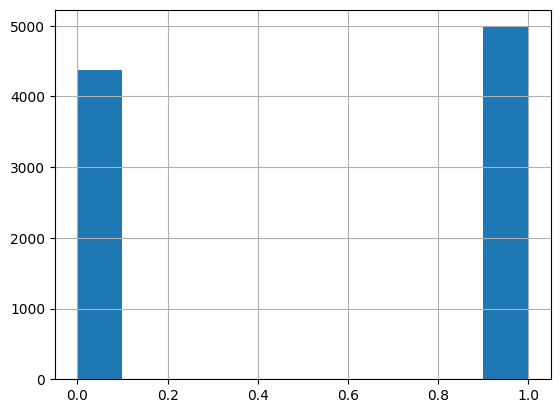

In [ ]:
# Evaluate target variable distribution
airquality.ozone_conc.hist()

### **Explore missing values**

<Axes: >

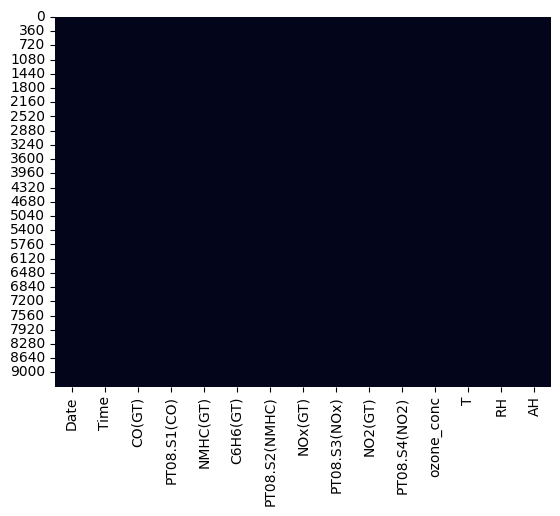

In [ ]:
sns.heatmap(airquality.isnull(), cbar=False)

In [ ]:
airquality

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  ozone_conc  \
0           1045.50    166.0       1056.25    113.0       1692.00           0   
1            954.75    103.0       1173.75     92.0       1558.75           1   
2            939.25    131.0       1140.00    114.0       1554.50           0   
3            948.25    172.0       1092.00    122.0       1583.75           0   
4            835.50    131.0       1205.00    116.0       1490.00           0   
...             ...      ...           ...      ...           ...         ...   
9352        1101.25    471.7        538.50    189.8       1374.25           0   
9353        1027.00    353.3        603.75    179.2       1263.50           0   
9354        1062.50    293.0        603.25    174.7       1240.75           0   
9355         960.50    234.5        701.50    155.7       1041.00           1   
9356        1047.25    265.2        654.00    167.7       1128.50           1   

           T         RH        AH  
0     13.600  48.875001  0.757754  
1     13.300  47.700000  0.725487  
2     11.900  53.975000  0.750239  
3     11.000  60.000000  0.786713  
4     11.150  59.575001  0.788794  
...      ...        ...       ...  
9352  21.850  29.250000  0.756824  
9353  24.325  23.725000  0.711864  
9354  26.900  18.350000  0.640649  
9355  28.325  13.550000  0.513866  
9356  28.500  13.125000  0.502804  

[9357 rows x 15 columns]

In [ ]:
airquality.describe()

Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480   -34.207524  1048.869652  -159.090093   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00     0.600000   921.000000  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1052.500000  -200.000000   
75%              2004-12-28 00:00:00     2.600000  1221.250000  -200.000000   
max              2005-04-04 00:00:00    11.900000  2039.750000  1189.000000   
std                              NaN    77.657170   329.817015   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
min    -200.000000    -200.000000  -200.000000   -200.000000  -200.000000   
25%       4.004958     711.000000    50.000000    637.000000    53.000000   
50%       7.886653     894.500000   141.000000    794.250000    96.000000   
75%      13.636091    1104.750000   284.200000    960.250000   133.000000   
max      63.741476    2214.000000  1479.000000   2682.750000   339.700000   
std      41.380154     342.315902   257.424561    321.977031   126.931428   

       PT08.S4(NO2)   ozone_conc            T           RH           AH  
count   9357.000000  9357.000000  9357.000000  9357.000000  9357.000000  
mean    1391.363266     0.532115     9.776600    39.483611    -6.837604  
min     -200.000000     0.000000  -200.000000  -200.000000  -200.000000  
25%     1184.750000     0.000000    10.950000    34.050000     0.692275  
50%     1445.500000     1.000000    17.200000    48.550000     0.976823  
75%     1662.000000     1.000000    24.075000    61.875000     1.296223  
max     2775.000000     1.000000    44.600000    88.725000     2.231036  
std      467.192382     0.498994    43.203438    51.215645    38.976670

In [ ]:
#Dropping unwanted columns
airquality = airquality.drop(['Date','Time'],axis=1)

In [ ]:
# #impute missing values
positive_temp_median = airquality[airquality['T'] >= 0]['T'].median()
# Replace negative values with the calculated mean
airquality.loc[airquality['T'] < 0, 'T'] = positive_temp_median

#impute missing values
for column in airquality.columns:
    # Calculate the median excluding -200 for the current column
    median_value = airquality.loc[airquality[column] != -200, column].median()

    # Replace -200 with the median value in the current column
    airquality[column].replace(-200, median_value, inplace=True)

In [ ]:
# Examine missing values
print(airquality.isnull().sum())

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
ozone_conc       0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
airquality.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6      1360.00       150  11.881723        1045.50    166.0   
1     2.0      1292.25       112   9.397165         954.75    103.0   
2     2.2      1402.00        88   8.997817         939.25    131.0   
3     2.2      1375.50        80   9.228796         948.25    172.0   
4     1.6      1272.25        51   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  ozone_conc      T         RH        AH  
0       1056.25    113.0       1692.00           0  13.60  48.875001  0.757754  
1       1173.75     92.0       1558.75           1  13.30  47.700000  0.725487  
2       1140.00    114.0       1554.50           0  11.90  53.975000  0.750239  
3       1092.00    122.0       1583.75           0  11.00  60.000000  0.786713  
4       1205.00    116.0       1490.00           0  11.15  59.575001  0.788794

In [ ]:
airquality.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.089302  1098.272025   156.721599    10.010899     937.854610   
std       1.323024   212.915093    67.058156     7.311212     261.622644   
min       0.100000   647.250000     7.000000     0.149048     383.250000   
25%       1.200000   941.250000   150.000000     4.591495     742.500000   
50%       1.800000  1063.000000   150.000000     8.239851     909.000000   
75%       2.600000  1221.250000   150.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)   ozone_conc  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    235.131100    834.202567   112.360329   1456.401901     0.532115   
std     195.093027    251.808390    43.938455    339.367768     0.498994   
min       2.000000    322.000000     2.000000    551.000000     0.000000   
25%     112.000000    665.500000    85.900000   1241.500000     0.000000   
50%     179.800000    805.500000   109.000000   1462.750000     1.000000   
75%     284.200000    960.250000   133.000000   1662.000000     1.000000   
max    1479.000000   2682.750000   339.700000   2775.000000     1.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean     18.322586    49.244785     1.024351  
std       8.627632    16.974420     0.395879  
min       0.050000     9.175000     0.184679  
25%      12.075000    36.550000     0.746115  
50%      17.775000    49.550000     0.995395  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

In [ ]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   ozone_conc     9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 950.4 KB


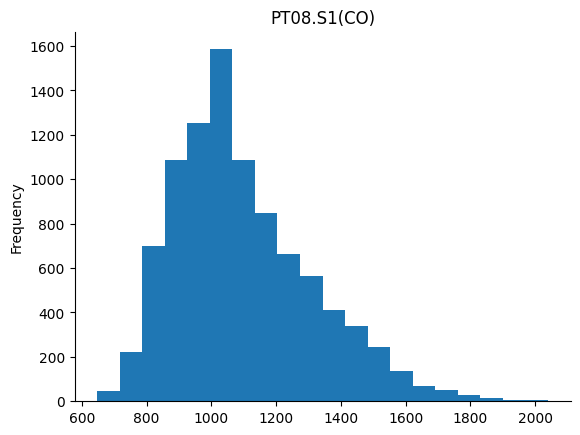

In [ ]:
# @title PT08.S1(CO)

from matplotlib import pyplot as plt
airquality['PT08.S1(CO)'].plot(kind='hist', bins=20, title='PT08.S1(CO)')
plt.gca().spines[['top', 'right',]].set_visible(False)

The x-axis of the histogram typically represents the carbon monoxide (CO) concentration levels which is a pollutant , while the y-axis represents the number of instances (frequency) of that concentration being measured

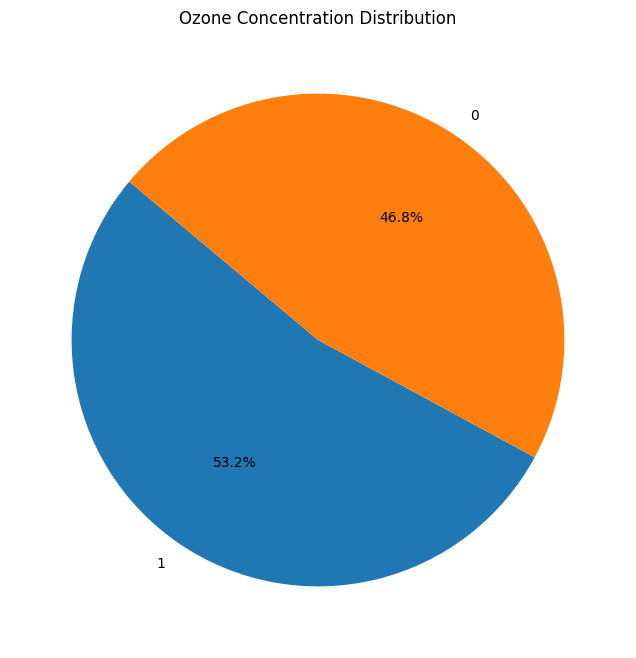

In [ ]:
# Calculate the percentage of each ozone concentration category
ozone_conc_counts = airquality['ozone_conc'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ozone_conc_counts, labels=ozone_conc_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ozone Concentration Distribution')
plt.show()



The pie chart shows the distribution of ozone concentration, which is a measure of air quality. Here, 0 represents poor air quality and 1 represents good air quality. The two slices of the pie chart show that 53.2% of the air samples have a good ozone concentration (class 1) and 46.8% of the air samples have poor ozone concentration (class 0).

### **Explore information value and distribution of features using Pairplot:**

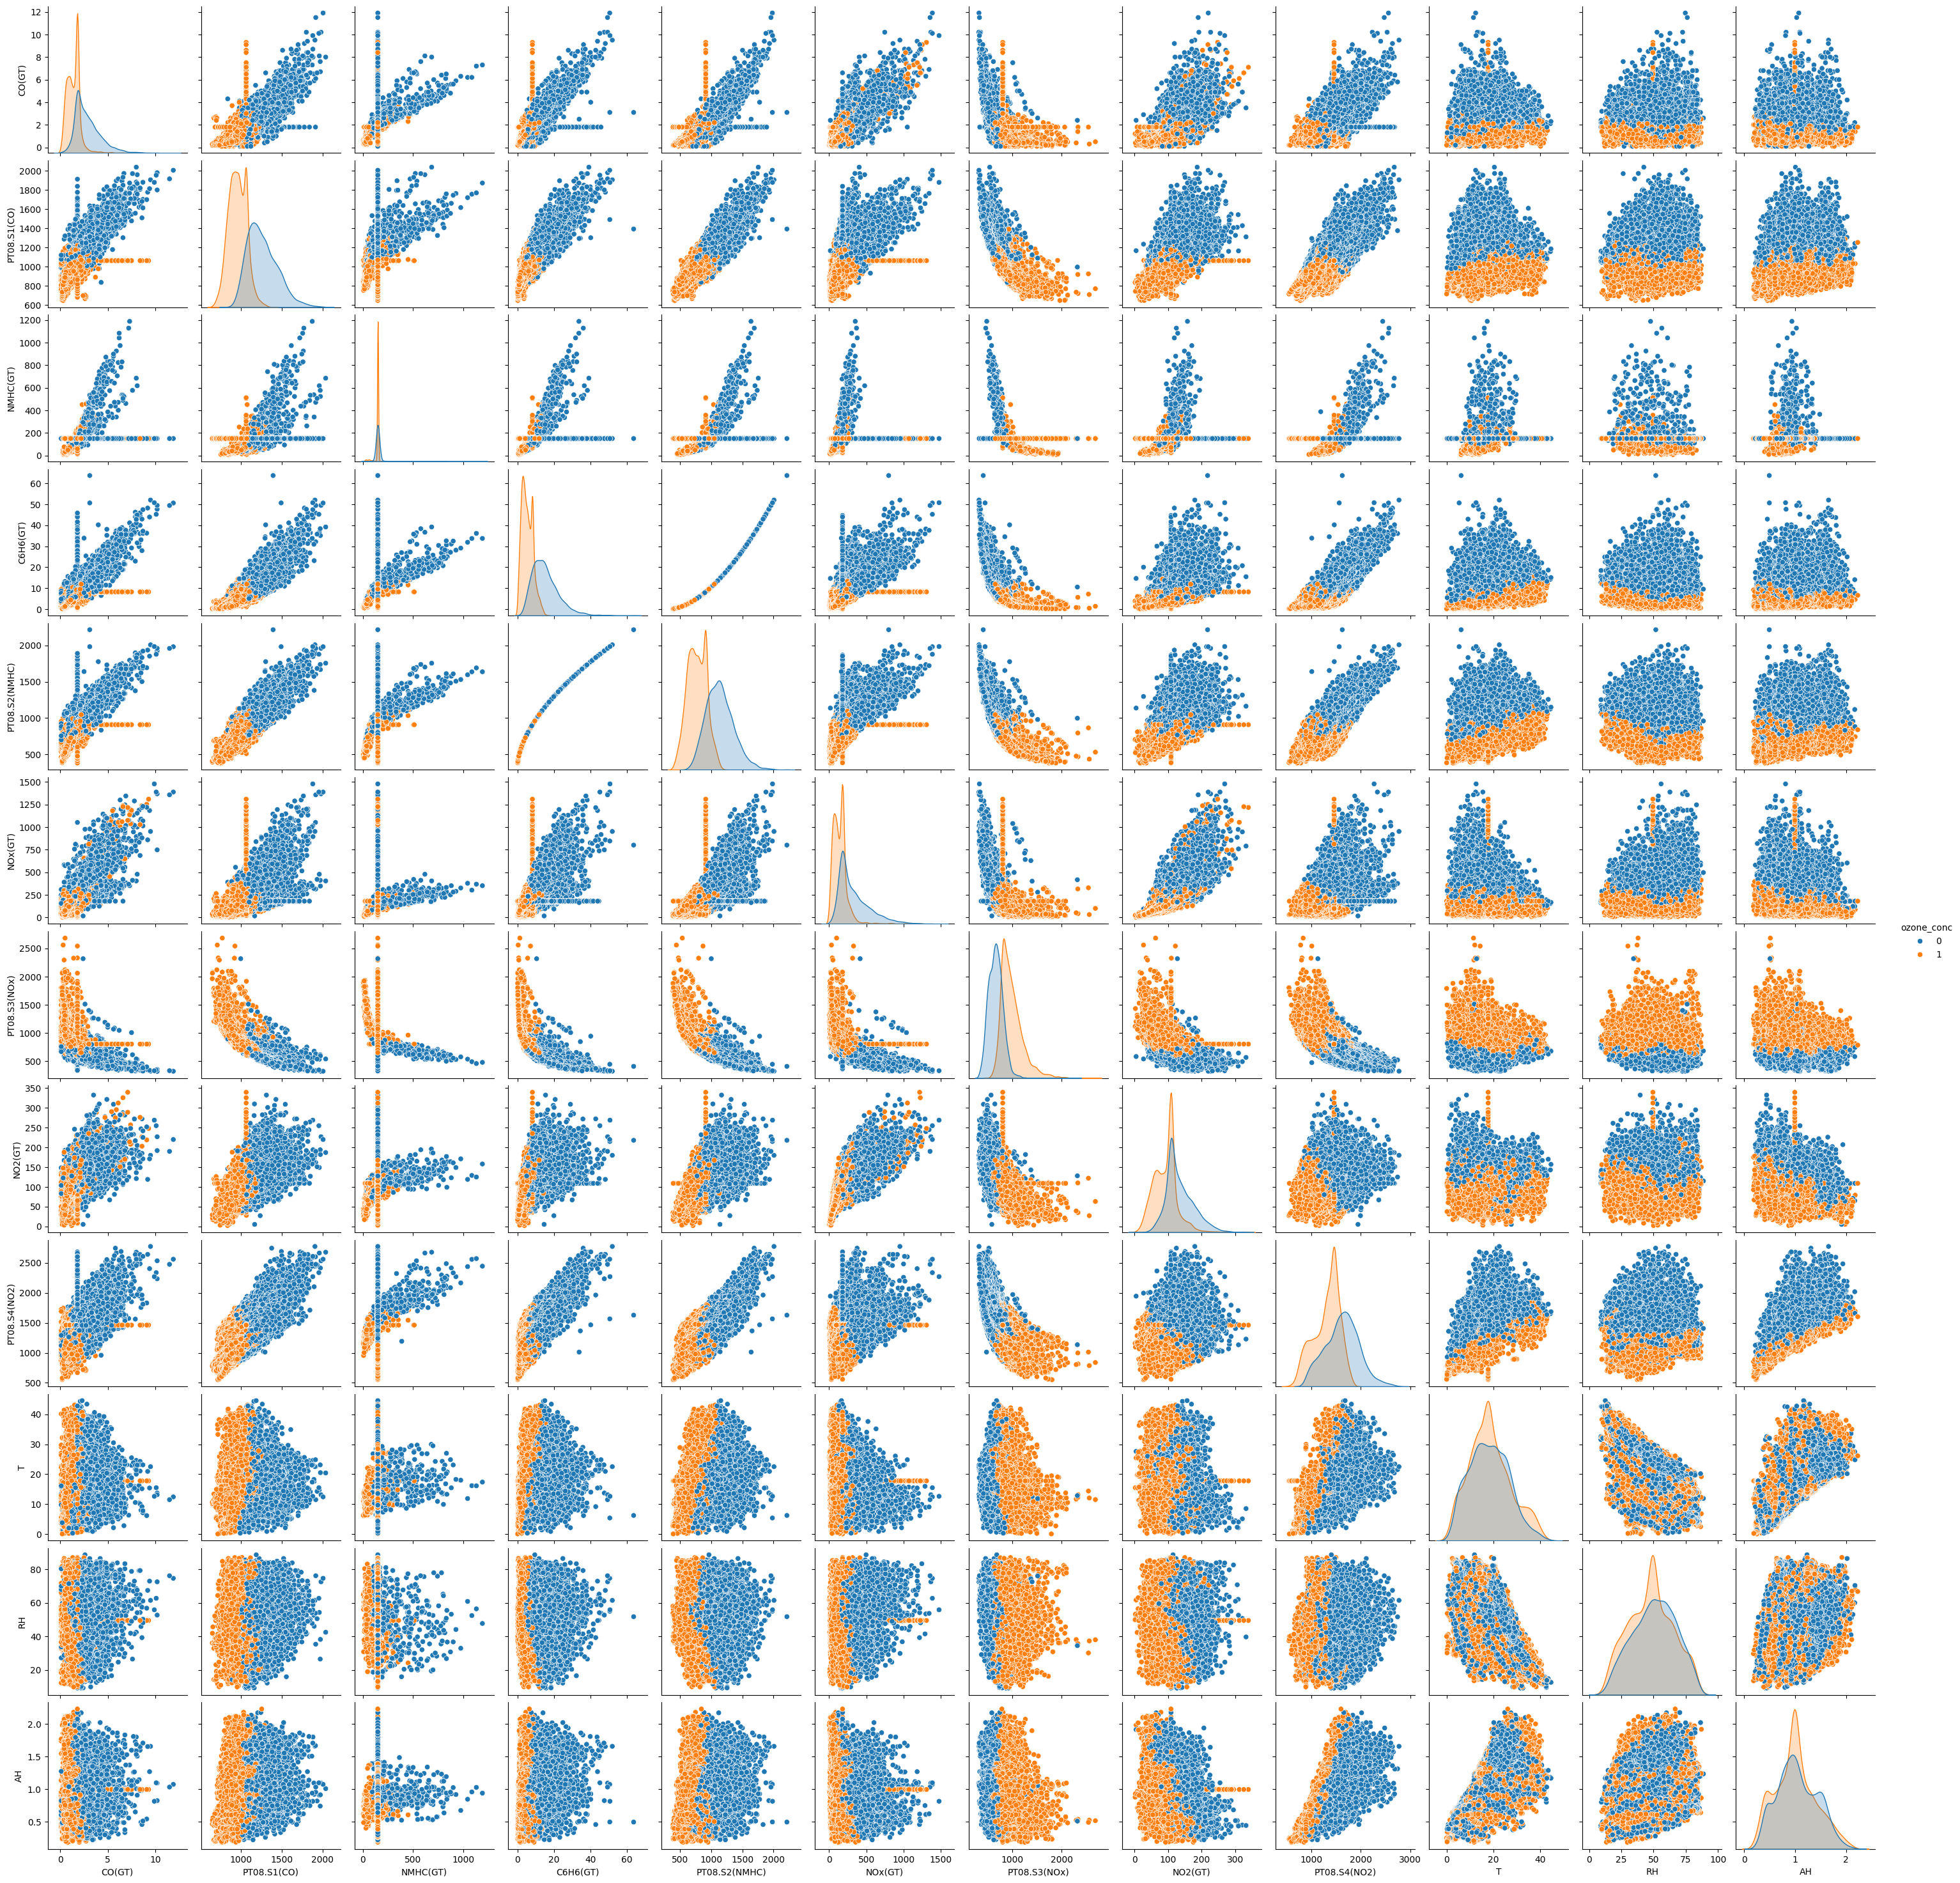

In [ ]:
#Examine data intercorrelations
sns.pairplot(airquality, hue = 'ozone_conc')

### **Developing Logistic Regression, kNN (optimize k), Random Forest, Naive Bayes and Boosted Tree models to predict the Air quality:**

# **Logit Model**

In [ ]:
X = airquality.drop('ozone_conc', axis=1)
y = airquality['ozone_conc']

In [ ]:
X.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6      1360.00       150  11.881723        1045.50    166.0   
1     2.0      1292.25       112   9.397165         954.75    103.0   
2     2.2      1402.00        88   8.997817         939.25    131.0   
3     2.2      1375.50        80   9.228796         948.25    172.0   
4     1.6      1272.25        51   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)      T         RH        AH  
0       1056.25    113.0       1692.00  13.60  48.875001  0.757754  
1       1173.75     92.0       1558.75  13.30  47.700000  0.725487  
2       1140.00    114.0       1554.50  11.90  53.975000  0.750239  
3       1092.00    122.0       1583.75  11.00  60.000000  0.786713  
4       1205.00    116.0       1490.00  11.15  59.575001  0.788794

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[1141,  159],
       [ 117, 1391]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1300
           1       0.90      0.92      0.91      1508

    accuracy                           0.90      2808
   macro avg       0.90      0.90      0.90      2808
weighted avg       0.90      0.90      0.90      2808



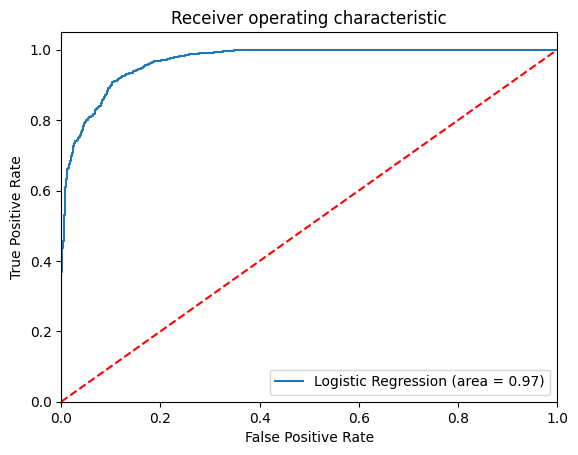

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **kNN Model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
X_rescaled.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      0.168585     0.323894     0.126668     0.155079       0.302938   
std       0.112121     0.152901     0.056733     0.114970       0.142905   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.093220     0.211131     0.120981     0.069858       0.196231   
50%       0.144068     0.298564     0.120981     0.127229       0.287177   
75%       0.211864     0.412208     0.120981     0.212086       0.394101   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)            T  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean      0.157841      0.216966     0.326800      0.407105     0.410159   
std       0.132087      0.106665     0.130111      0.152593     0.193662   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%       0.074475      0.145505     0.248445      0.310477     0.269921   
50%       0.120379      0.204808     0.316849      0.409960     0.397868   
75%       0.191063      0.270359     0.387918      0.499550     0.539282   
max       1.000000      1.000000     1.000000      1.000000     1.000000   

                RH           AH  
count  9357.000000  9357.000000  
mean      0.503706     0.410326  
std       0.213381     0.193455  
min       0.000000     0.000000  
25%       0.344123     0.274359  
50%       0.507542     0.396175  
75%       0.662476     0.543182  
max       1.000000     1.000000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

## **Find Optimum k-value:**

In [ ]:

# Determine the optimal value of k based on ROC AUC using cross-validation
max_K = 100
cv_scores = []

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc")
    cv_scores.append(scores.mean())


<Axes: >

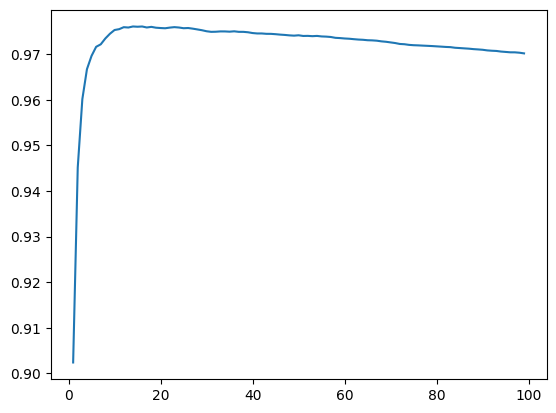

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
cv_scores[:4]

[0.9024029231090293,
 0.9451806006094685,
 0.9601687514357435,
 0.9667350686255107]

In [ ]:
# Find the index of the maximum ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieve the optimal k value
optimal_k = optimal_k_index + 1  # Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1

# Retrieve the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]

# Print the results
print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)


Optimal k for maximum ROC AUC: 14
Maximum ROC AUC: 0.9761011636302422


##  **Optimized kNN model with K=12**

---



In [ ]:
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1184  116]
 [ 141 1367]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1300
           1       0.92      0.91      0.91      1508

    accuracy                           0.91      2808
   macro avg       0.91      0.91      0.91      2808
weighted avg       0.91      0.91      0.91      2808



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.9086339522546419


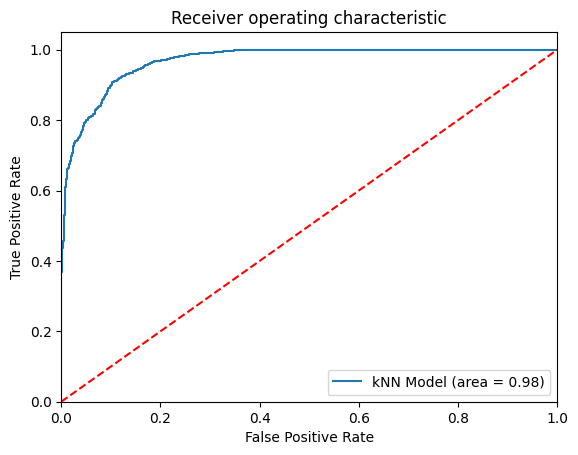

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Random Forest Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[1143,  157],
       [ 111, 1397]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1300
           1       0.90      0.93      0.91      1508

    accuracy                           0.90      2808
   macro avg       0.91      0.90      0.90      2808
weighted avg       0.90      0.90      0.90      2808



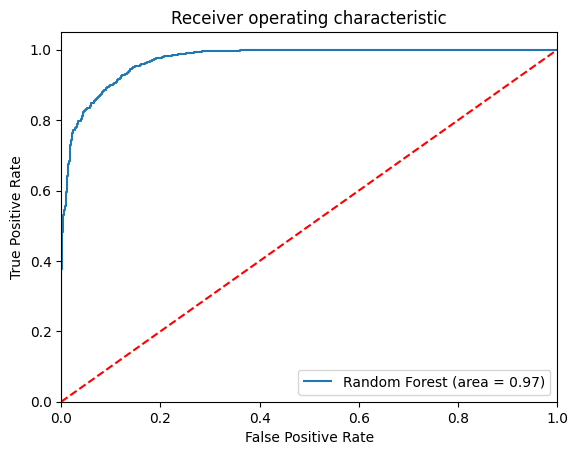

In [ ]:
# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Boosted tree Model**

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[1178,  122],
       [ 123, 1385]])

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1300
           1       0.92      0.92      0.92      1508

    accuracy                           0.91      2808
   macro avg       0.91      0.91      0.91      2808
weighted avg       0.91      0.91      0.91      2808



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.9086339522546419


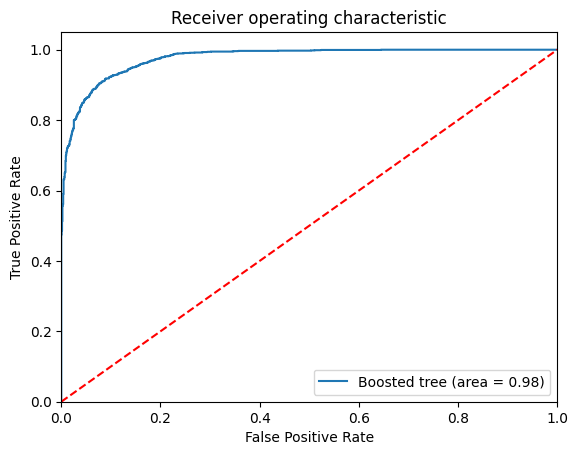

In [ ]:
# Boosted Tree:
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Decision Tree Model**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]


print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

ROC AUC:  0.8854376657824934
[[1153  147]
 [ 175 1333]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1300
           1       0.90      0.88      0.89      1508

    accuracy                           0.89      2808
   macro avg       0.88      0.89      0.88      2808
weighted avg       0.89      0.89      0.89      2808



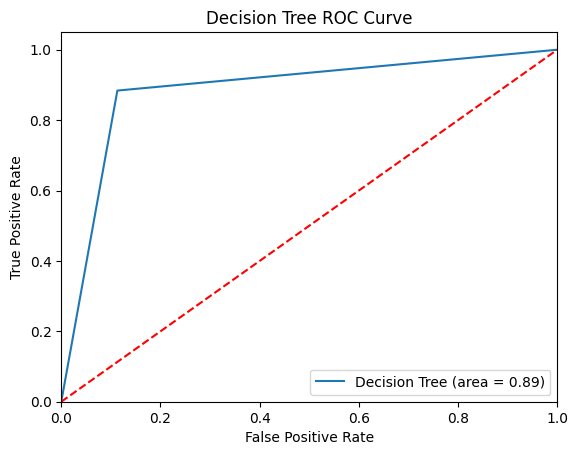

In [ ]:
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Naive Bayes**

In [ ]:
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

y_pred = delays_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1100  200]
 [ 199 1309]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1300
           1       0.87      0.87      0.87      1508

    accuracy                           0.86      2808
   macro avg       0.86      0.86      0.86      2808
weighted avg       0.86      0.86      0.86      2808



**Precision:** Precision for class 0 (Bad Quality Air) is 0.85 . This means 85% of the time the model predicted good air quality, it was actually correct. Precision for class 1 (Good Quality Air) is 0.87. Similar to class 0, 87% of the predictions for bad air quality were accurate.

**Recall:** Recall for class 0 is 0.85. This indicates the model identified 85% of actual good air quality instances correctly. Recall for class 1 is 0.87. The model captured 87% of the actual bad air quality cases.

**F1-Score:** Both classes have a high F1-score (around 0.86), indicating a good balance between precision and recall for both good and bad air quality classifications.

**Accuracy:** The overall accuracy is 0.86. This signifies that 86% of the time, the model correctly classified air quality as good or bad.

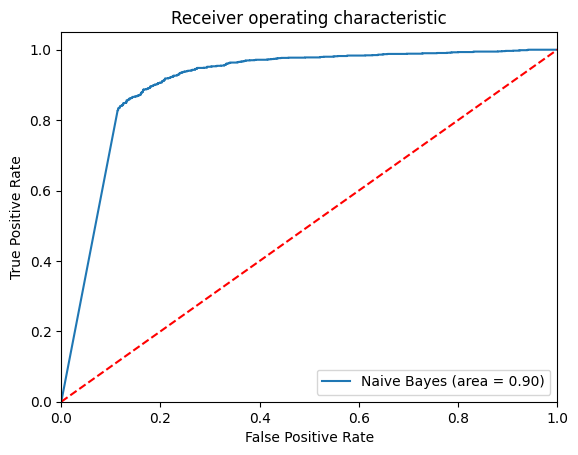

In [ ]:
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install -- eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=32de61ee0ca8be78560069faf7bf2e30b54795821981a31ce622837b5f8c4b48
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(delays_nb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

**1. Highly Influential Features:**

PT08.S3(NOx) (Weight: 0.1210) - This sensor reading for NOx seems to be the most influential factor in determining air quality.

**2. Moderately Influential Features:**

NOx(GT) (Weight: 0.0520) - The overall ground truth NOx value holds some significance.
PT08.S2(NMHC) (Weight: 0.0255) - This sensor reading for NMHC (Non-methane Hydrocarbons) is moderately influential.

**3. Minor Influential Features:**

Features, such as PT08.S1(CO) and NMHC(GT) have relatively low weights (around 0.0001), indicating a minor influence on the air quality prediction.

**4. Negligible Influence Features:**

Features with weights of 0 or less than zero (± 0.0000) have negligible influence on predicting lair quality in this model.
In summary, the model suggests that factors like PT08.S3(NOx), NOx(GT) and PT08.S2(NMHC) carry the most weight in determining air quality while other features play a comparatively lesser role in the decision-making process.

# **ANN Model**

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes= 19, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1170  130]
 [ 171 1337]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1300
           1       0.91      0.89      0.90      1508

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9635232605590696


In [ ]:
min_hidden_layer_size = 5
max_hidden_layer_size = 100
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

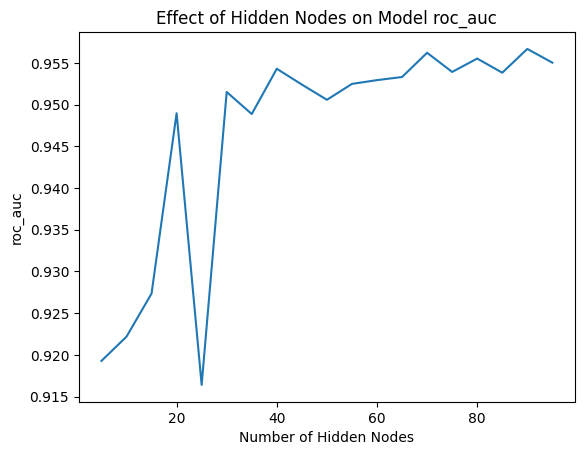

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('roc_auc')
plt.title('Effect of Hidden Nodes on Model roc_auc')
plt.show()

In [ ]:
max_Roc_auc = max(cv_scores)  # Find the maximum Roc_auc
optimal_hidden_nodes = range(min_hidden_layer_size, max_hidden_layer_size, 5)[cv_scores.index(max_Roc_auc)]  # Find the corresponding number of hidden nodes

print("Maximum Roc_auc:", max_Roc_auc)
print("Number of Hidden Nodes for Maximum Roc_auc:", optimal_hidden_nodes)


Maximum Roc_auc: 0.9566751646750158
Number of Hidden Nodes for Maximum Roc_auc: 90


In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=10, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1150  150]
 [ 162 1346]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1300
           1       0.90      0.89      0.90      1508

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9572888186084473


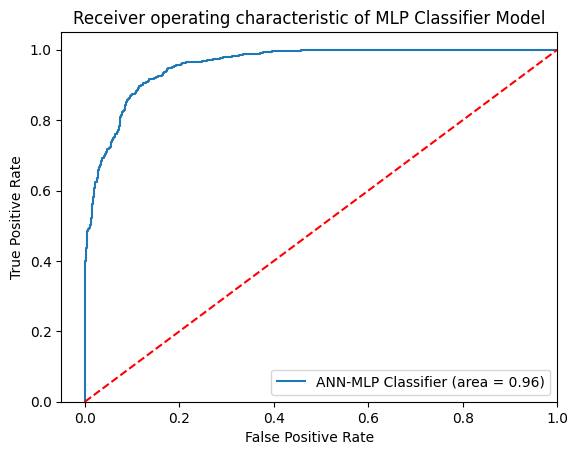

In [ ]:
MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ANN-MLP Classifier (area = %0.2f)' % MLPC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of MLP Classifier Model')
plt.legend(loc="lower right")
plt.savefig('MLPC_ROC')
plt.show()

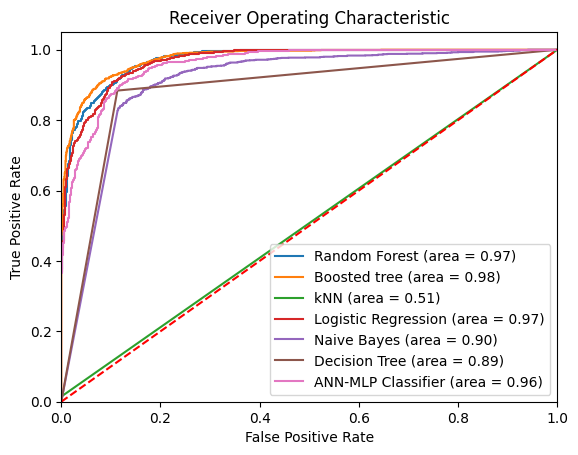

In [ ]:
# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

# kNN Model
kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
logit_fpr, logit_tpr, _ = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# Naive Bayes
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, _ = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

# Decision Tree Model
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])

#ANN Model
MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN (area = %0.2f)' % kNN_roc_auc)
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(fpr, tpr, label='ANN-MLP Classifier (area = %0.2f)' % MLPC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')  # Save the plot as an image
plt.show()

# **Keras Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train.shape

(6549, 12)

In [ ]:
model = Sequential()


model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
52/52 [==============================] - 2s 8ms/step - loss: 0.5774 - val_loss: 0.3913
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 0.2910 - val_loss: 0.2557
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.2404 - val_loss: 0.2306
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.2323 - val_loss: 0.2258
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.2302 - val_loss: 0.2409
Epoch 6/100
52/52 [==============================] - 0s 5ms/step - loss: 0.2279 - val_loss: 0.2271
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 0.2253 - val_loss: 0.2194
Epoch 8/100
52/52 [==============================] - 0s 5ms/step - loss: 0.2220 - val_loss: 0.2207
Epoch 9/100
52/52 [==============================] - 0s 5ms/step - loss: 0.2258 - val_loss: 0.2292
Epoch 10/100
52/52 [==============================] - 0s 5ms/step - loss: 0.2209 - val_loss: 0.2179
Epoch 11/

<Axes: >

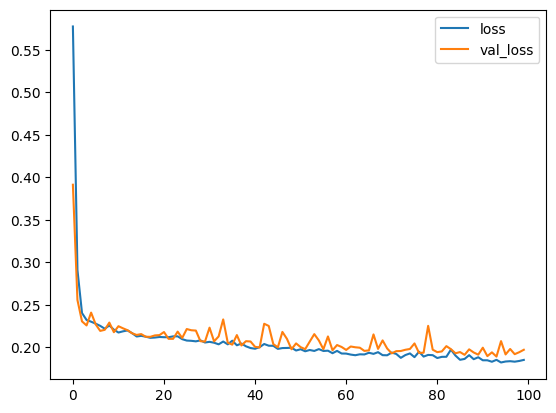

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
#Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Use early stopping callback to prevent overfitting.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
52/52 [==============================] - 2s 8ms/step - loss: 1.6004 - val_loss: 0.6497
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.7701 - val_loss: 0.4481
Epoch 3/100
52/52 [==============================] - 0s 5ms/step - loss: 0.6137 - val_loss: 0.3351
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5460 - val_loss: 0.3060
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5498 - val_loss: 0.3170
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4802 - val_loss: 0.2858
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.4479 - val_loss: 0.2944
Epoch 8/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4448 - val_loss: 0.3070
Epoch 9/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4720 - val_loss: 0.2764
Epoch 10/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4452 - val_loss: 0.2635
Epoch 11/

<Axes: >

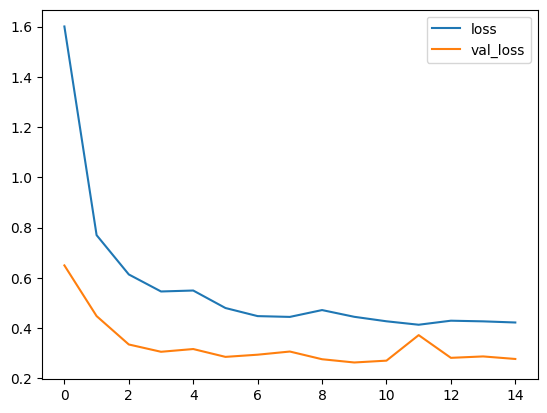

In [ ]:
#Plot training and validation losses versus epochs.
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

88/88 [==============================] - 0s 2ms/step


In [ ]:
#Print out model classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1300
           1       0.93      0.80      0.86      1508

    accuracy                           0.86      2808
   macro avg       0.86      0.86      0.86      2808
weighted avg       0.87      0.86      0.86      2808



In [ ]:
# Print out model confusion matrix AND ROC curve
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

[[1212   88]
 [ 309 1199]]
88/88 [==============================] - 0s 2ms/step
ROC AUC:  0.9660666190573353


88/88 [==============================] - 0s 2ms/step


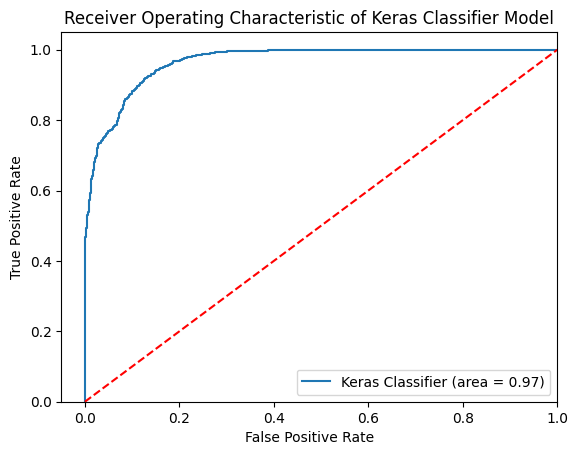

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have trained a Keras model named 'model'
# and you have test data X_test and corresponding labels y_test

# Predict probabilities for the test data
y_pred_proba = model.predict(X_test)

# Calculate ROC AUC score
MLPC_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Keras Classifier (area = %0.2f)' % MLPC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Keras Classifier Model')
plt.legend(loc="lower right")
plt.savefig('Keras_ROC')
plt.show()


# **Final ROC AUC Curve**

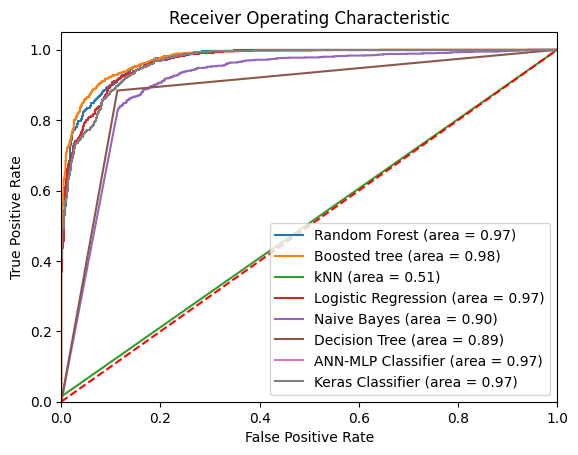

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

'''# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

# kNN Model
kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
logit_fpr, logit_tpr, _ = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# Naive Bayes
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, _ = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

# Decision Tree Model
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])

#ANN Model
MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])'''

# Keras Model (assuming MLPC_roc_auc is defined elsewhere)
keras_roc_auc = roc_auc_score(y_test, y_pred_proba)
keras_fpr, keras_tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN (area = %0.2f)' % kNN_roc_auc)
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(fpr, tpr, label='ANN-MLP Classifier (area = %0.2f)' % MLPC_roc_auc)
plt.plot(keras_fpr, keras_tpr, label='Keras Classifier (area = %0.2f)' % keras_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')  # Save the plot as an image
plt.show()


### **Assessing the performance of each model using the following metrics:**

### **Recall, Precision, F1, ROC AUC:**

##**Air Quality Data Analysis:**

### **Logistic Regression Model:**
The logistic regression model performs well overall, as seen by its accuracy of 0.90. With 0.91 for poor air quality (0) and 0.90 for excellent air quality (1), accuracy and recall are also strong for both classes. With 0.89 for poor air quality and 0.91 for high air quality, the F1 scores for both classes are thus balanced. With a weighted average F1 score of 0.90, the model shows a great capacity to discriminate between excellent and bad air quality.

### **kNN Model:**
The kNN model performs slightly better than logistic regression with an accuracy of 0.91. It shows high precision and recall for both classes, with 0.89 for bad air quality and 0.92 for good air quality. The F1 scores are also balanced, with 0.90 for bad air quality and 0.91 for good air quality. The model exhibits a strong ability to classify air quality accurately, with a weighted average F1 score of 0.91.

### **Random Forest Model:**
Similar to logistic regression, the random forest model achieves an accuracy of 0.90. It shows high precision for both classes, with 0.91 for bad air quality and 0.90 for good air quality. The recall is slightly higher for good air quality at 0.93 compared to bad air quality at 0.88. The F1 scores are balanced, with 0.90 for bad air quality and 0.91 for good air quality. Overall, the model demonstrates a strong ability to classify air quality accurately, with a weighted average F1 score of 0.90.

### **Boosted Tree Model:**
The boosted tree model also achieves an accuracy of 0.91, similar to the kNN model and the random forest model. It shows high precision and recall for both classes, with 0.91 for bad air quality and 0.91 for good air quality. The F1 scores are balanced, with 0.90 for bad air quality and 0.92 for good air quality. The model exhibits a strong ability to classify air quality accurately, with a weighted average F1 score of 0.91.

### **Decision Tree Model:**
The decision tree model achieves an accuracy of 0.88, comparable to the logistic regression model. It performs well in identifying both classes, with a slightly lower recall for bad air quality (0) compared to good air quality (1). The F1-score for bad air quality (0) is 0.88, and for good air quality (1), it is 0.89. The macro-average F1-score stands at 0.88, indicating consistent performance across classes.

### **Naive Bayes Model:**
The Naive Bayes model achieves an accuracy of 0.86, slightly lower than the other models. It shows relatively good precision and recall for both classes, with 0.85 for bad air quality and 0.87 for good air quality. The F1 scores are also balanced, with 0.85 for bad air quality and 0.87 for good air quality. The model demonstrates a moderate ability to classify air quality accurately, with a weighted average F1 score of 0.86.

###**Artificial Neural Network (ANN) Model:**
The ANN model achieves an accuracy of 0.89, demonstrating balanced precision and recall for both classes, with a slightly higher recall for good air quality. The F1-scores for bad and good air quality are 0.89 and 0.90, respectively. This suggests that the ANN model performs comparably well to other models in classifying air quality.

###**Keras Model:**
The Keras model achieves an accuracy of 0.87, slightly lower than some of the other models. It demonstrates balanced precision and recall for both classes, with a slightly higher recall for bad air quality. The F1-scores for bad and good air quality are 0.86 and 0.87, respectively. While still respectable, the Keras model's performance is slightly lower compared to other models.


### **Conclusion on Best Model:**
Considering the classification results and the balanced performance across precision, recall, and F1 scores, the boosted tree model appears to be the best model among the options for classifying air quality. It achieves a high accuracy of 0.91 and demonstrates a strong ability to distinguish between good and bad air quality, as indicated by its balanced performance metrics and weighted average F1 score of 0.91.